<a href="https://colab.research.google.com/github/sharpened-ferret/CSC345-Object-Recognition/blob/main/object_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC345: Object Recognition Coursework
This notebook details an object recognition method for a subset of the CIFAR-100 dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature

BASE_PATH = '/content/drive/MyDrive/Colab Notebooks/cw_data/'

Loads the training data

In [19]:
trn_images = np.load(BASE_PATH+'/trnImage.npy')
trn_label_fine = np.load(BASE_PATH+'/trnLabel_fine.npy')
trn_label_coarse = np.load(BASE_PATH+'/trnLabel_coarse.npy')

# trn_label_coarse = tf.keras.utils.to_categorical(trn_label_coarse, 20)

print(f'Images Shape: {trn_images.shape}')
print(f'Images Fine Labels Shape: {trn_label_fine.shape}')
print(f'Images Coarse Labels Shape: {trn_label_coarse.shape}')
image_index = 2 # pick a specific image
image = trn_images[:, :, :, image_index]

Images Shape: (32, 32, 3, 50000)
Images Fine Labels Shape: (50000,)
Images Coarse Labels Shape: (50000,)


In [20]:
print(trn_images.shape)
trn_images = np.transpose(trn_images, (3,0,1,2))
print(trn_images.shape)

(32, 32, 3, 50000)
(50000, 32, 32, 3)


In [44]:
import tensorflow as tf

x_train = trn_images.astype("float32")
print(x_train.shape)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(128, 3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(100))

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

(50000, 32, 32, 3)


In [45]:
history = model.fit(x_train, trn_label_fine, batch_size=128, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
313/313 [==============================] - 8s 24ms/step - loss: 4.1156 - accuracy: 0.0728 - val_loss: 3.7295 - val_accuracy: 0.1336
Epoch 2/10
313/313 [==============================] - 6s 19ms/step - loss: 3.4510 - accuracy: 0.1778 - val_loss: 3.3211 - val_accuracy: 0.2046
Epoch 3/10
313/313 [==============================] - 6s 19ms/step - loss: 3.0774 - accuracy: 0.2438 - val_loss: 3.0041 - val_accuracy: 0.2629
Epoch 4/10
313/313 [==============================] - 6s 19ms/step - loss: 2.8451 - accuracy: 0.2923 - val_loss: 2.9174 - val_accuracy: 0.2840
Epoch 5/10
313/313 [==============================] - 6s 19ms/step - loss: 2.6739 - accuracy: 0.3266 - val_loss: 2.8093 - val_accuracy: 0.2982
Epoch 6/10
313/313 [==============================] - 6s 19ms/step - loss: 2.5227 - accuracy: 0.3571 - val_loss: 2.6910 - val_accuracy: 0.3303
Epoch 7/10
313/313 [==============================] - 6s 19ms/step - loss: 2.4102 - accuracy: 0.3802 - val_loss: 2.6488 - val_accuracy: 0.3381

Graphs of the Model's performance during training:

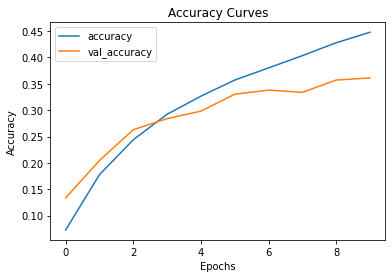

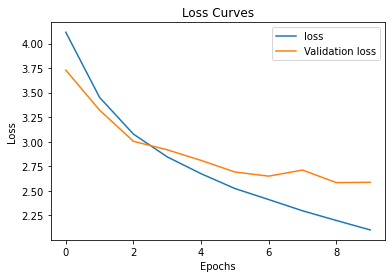

In [49]:
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title("Accuracy Curves")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("Loss Curves")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [52]:
tst_images = np.load(BASE_PATH+'/tstImage.npy')
tst_label_fine = np.load(BASE_PATH+'/tstLabel_fine.npy')
tst_label_coarse = np.load(BASE_PATH+'/tstLabel_coarse.npy')

tst_images = np.transpose(tst_images, (3,0,1,2))
tst_images = tst_images.astype("float32")
print(tst_images.shape)
print(tst_label_coarse.shape)

model.evaluate(tst_images, tst_label_fine, verbose=1)

(10000, 32, 32, 3)
(10000,)
313/313 [==============================] - 2s 6ms/step - loss: 2.5456 - accuracy: 0.3642


[2.545574903488159, 0.36419999599456787]